<a href="https://colab.research.google.com/github/erickgt00/Deep-Learning/blob/main/ProyectoFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final | Predicción de la Inflación en México

El objetivo principal de esta tesina es desarrollar un modelo predictivo preciso y confiable que permita estimar la tasa de inflación en México utilizando técnicas avanzadas de Machine Learning en combinación con el análisis económico tradicional. La inflación es un indicador económico crucial que afecta directamente la estabilidad y el crecimiento económico del país, así como el bienestar de sus ciudadanos. Por lo tanto, contar con un método preciso de predicción de la inflación se convierte en una herramienta esencial para tomar decisiones informadas en materia de política monetaria y fiscal.

## Análisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import array
from numpy import append
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [ ]:
df = pd.read_csv("df.csv")
df.head(10)

,Fecha,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP,INPC Mexico
0,ene-96,7.370,0.027,313.5091,-1.629,0.414,57939.4,5245.8,6428.2,0.517
1,feb-96,7.610,0.027,281.9257,0.848,-0.164,57822.5,9860.7,7274.4,0.489
2,mar-96,7.529,0.028,337.3185,3.895,-0.375,59499.4,13137.2,3326.2,0.438
3,abr-96,7.415,0.029,393.3877,-0.351,0.005,57172.2,9476.9,2484.8,0.369
4,may-96,7.470,0.029,413.5420,-2.529,0.311,60519.1,13756.7,4354.8,0.338
5,jun-96,7.585,0.028,365.2451,-0.573,0.167,61592.3,12151.4,3630.6,0.318
6,jul-96,7.585,0.030,373.6705,-0.114,0.205,61481.8,22981.2,4498.8,0.310
7,ago-96,7.580,0.029,386.0666,0.532,0.217,60983.6,28060.5,2592.7,0.306
8,sep-96,7.535,0.030,339.2533,1.529,0.257,61639.9,24621.1,3002.2,0.300
9,oct-96,7.970,0.030,348.9010,2.551,-0.511,64179.6,35863.0,5485.9,0.290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            329 non-null    object 
 1   USD.MXN          329 non-null    float64
 2   IPC USA          329 non-null    float64
 3   Remesas.MDD      329 non-null    float64
 4   IPE              329 non-null    float64
 5   IPI              329 non-null    float64
 6   B.Monetaria.MDP  329 non-null    float64
 7   AIN.MDP          329 non-null    float64
 8   DineroNuevo.MDP  329 non-null    float64
 9   INPC Mexico      329 non-null    float64
dtypes: float64(9), object(1)
memory usage: 25.8+ KB


In [ ]:
df.shape

(329, 10)

In [ ]:
df = df.drop(columns=['Fecha'])
df.head()

,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP,INPC Mexico
0,7.370,0.027,313.5091,-1.629,0.414,57939.4,5245.8,6428.2,0.517
1,7.610,0.027,281.9257,0.848,-0.164,57822.5,9860.7,7274.4,0.489
2,7.529,0.028,337.3185,3.895,-0.375,59499.4,13137.2,3326.2,0.438
3,7.415,0.029,393.3877,-0.351,0.005,57172.2,9476.9,2484.8,0.369
4,7.470,0.029,413.5420,-2.529,0.311,60519.1,13756.7,4354.8,0.338


In [ ]:
df.describe()

,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP,INPC Mexico
count,329.000000,329.000000,329.000000,329.000000,329.000000,3.290000e+02,3.290000e+02,329.000000,329.000000
mean,13.450888,0.025036,1942.825774,0.206836,0.203766,7.949023e+05,1.768344e+06,18772.965653,0.073046
std,4.238461,0.017020,1187.409903,2.065758,0.564586,7.089339e+05,1.422600e+06,25688.701856,0.072078
min,7.370000,-0.021000,281.925700,-11.520000,-2.425000,5.717220e+04,5.245800e+03,298.500000,0.021000
25%,10.201000,0.016000,912.205000,-0.757000,-0.092000,2.274567e+05,4.781150e+05,4704.800000,0.038000
50%,12.346900,0.022000,1889.655800,0.405000,0.170000,5.476533e+05,1.253285e+06,9351.300000,0.046000
75%,18.009900,0.032000,2367.642800,1.390000,0.493000,1.245686e+06,3.208490e+06,20397.700000,0.068000
max,24.151000,0.091000,5693.093000,5.708000,2.204000,2.700041e+06,4.694191e+06,153338.700000,0.517000


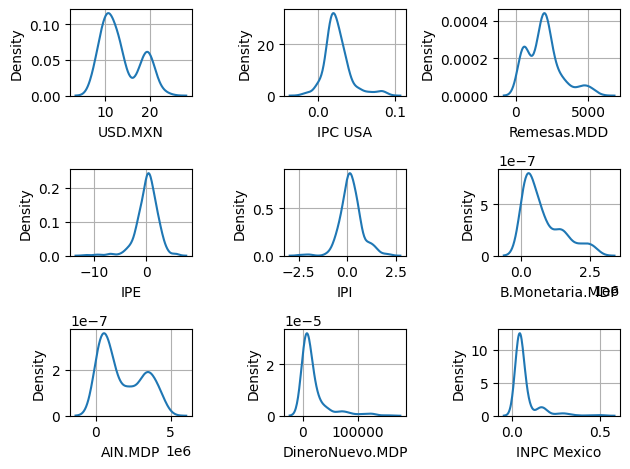

In [ ]:
r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()



De lo anterior podemos observar lo siguiente:

* Que la mayor densidad de inflación en México la encontramos en niveles entre el 2 y 13 por ciento. En cambio la inlfación en Estdos Unidos se encuentra en niveles del 0 al 7 por ciento.
* Las remesas concentran gran densidad entre 1,000 y 3,500 millones de dólares.
* Que la gran densidad de los índices de precios de exportación e importación se encuentran muy cercanos al 0.
* Que por lo general, Banxico emite cerca entre 10,000 y 40,000 millones de pesos nuevos al mes.

In [ ]:
matriz_correlacion = df.corr()

In [ ]:
matriz_correlacion

,USD.MXN,IPC USA,Remesas.MDD,IPE,IPI,B.Monetaria.MDP,AIN.MDP,DineroNuevo.MDP,INPC Mexico
USD.MXN,1.000000,0.105545,0.844594,-0.028681,0.091768,0.929778,0.970109,0.391286,-0.443299
IPC USA,0.105545,1.000000,0.435560,0.065541,0.353878,0.337938,0.141140,0.080785,0.092321
Remesas.MDD,0.844594,0.435560,1.000000,0.014369,0.201878,0.925386,0.858270,0.365888,-0.447069
IPE,-0.028681,0.065541,0.014369,1.000000,0.520769,0.023370,-0.033136,-0.199779,-0.010854
IPI,0.091768,0.353878,0.201878,0.520769,1.000000,0.154805,0.094280,-0.069220,-0.106988
B.Monetaria.MDP,0.929778,0.337938,0.925386,0.023370,0.154805,1.000000,0.951473,0.408201,-0.335241
AIN.MDP,0.970109,0.141140,0.858270,-0.033136,0.094280,0.951473,1.000000,0.391589,-0.432503
DineroNuevo.MDP,0.391286,0.080785,0.365888,-0.199779,-0.069220,0.408201,0.391589,1.000000,-0.157878
INPC Mexico,-0.443299,0.092321,-0.447069,-0.010854,-0.106988,-0.335241,-0.432503,-0.157878,1.000000


In [ ]:
from tabulate import tabulate

In [ ]:
tabla_latex = tabulate(matriz_correlacion, headers='keys', tablefmt='latex')

print(tabla_latex)

\begin{tabular}{lrrrrrrrrr}
\hline
                 &    USD.MXN &   IPC USA &   Remesas.MDD &        IPE &        IPI &   B.Monetaria.MDP &    AIN.MDP &   DineroNuevo.MDP &   INPC Mexico \\
\hline
 USD.MXN         &  1         & 0.105545  &     0.844594  & -0.0286815 &  0.0917678 &          0.929778 &  0.970109  &         0.391286  &    -0.443299  \\
 IPC USA         &  0.105545  & 1         &     0.43556   &  0.0655405 &  0.353878  &          0.337938 &  0.14114   &         0.0807848 &     0.0923213 \\
 Remesas.MDD     &  0.844594  & 0.43556   &     1         &  0.0143691 &  0.201878  &          0.925386 &  0.85827   &         0.365888  &    -0.447069  \\
 IPE             & -0.0286815 & 0.0655405 &     0.0143691 &  1         &  0.520769  &          0.02337  & -0.0331356 &        -0.199779  &    -0.010854  \\
 IPI             &  0.0917678 & 0.353878  &     0.201878  &  0.520769  &  1         &          0.154805 &  0.09428   &        -0.0692201 &    -0.106988  \\
 B.Monetaria.MDP &  0.

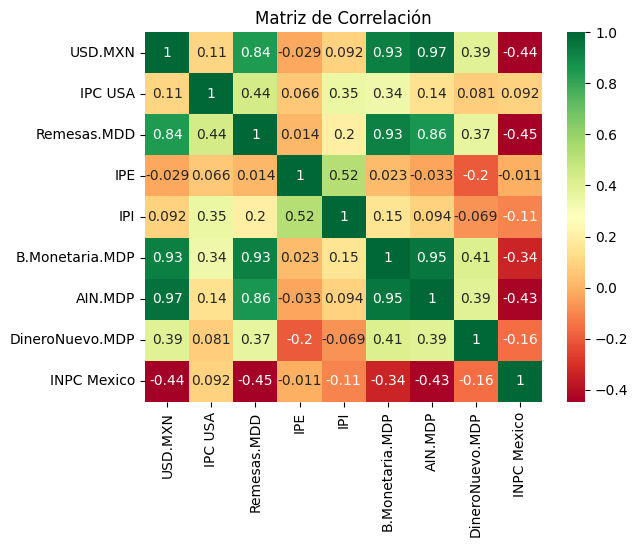

In [ ]:
sns.heatmap(matriz_correlacion, annot=True, cmap='RdYlGn')
plt.title('Matriz de Correlación')
plt.show()

De lo anterior podemos destacar lo siguiente para la inflación en México:

* El Índice Nacional de Precios al Consumidor de México muestra una correlación negativa moderada con el Tipo de Cambio y las Remesas hacia México. Esto sugiere que un aumento en el tipo de cambio o en las remesas podría estar asociado con una disminución en el nivel general de precios en México.

* Que el Tipo de Cambio muestra una fuerte correlación positiva con las Remesas y los Activos Internacionales Netos de Banco de México. Esto indica que un tipo de cambio más alto se asocia con mayores remesas y mayores activos internacionales netos para el Banco de México.

* Que el Índice de Precios al Consumidor de Estados Unidos muestra una correlación moderada con las Remesas y el Índice de Precios de Importaciones. Esto sugiere que los cambios en los precios en Estados Unidos pueden tener algún impacto en las remesas hacia México y en los precios de importaciones en México.

* También que el Índice de Precios de Exportaciones muestra una correlación moderada con Índice de Precios de Importaciones. Esto indica que los precios de las exportaciones y las importaciones pueden tener cierta relación lineal positiva.

* A su vez, la Base Monetaria del Banco de México muestra una correlación fuerte con el Tipo de Cambio, las Remesas y los Activos Internacionales de Banxico. Esto sugiere que cambios significativos en la base monetaria pueden estar asociados con cambios en el tipo de cambio, remesas y activos internacionales netos del Banco de México.

<Axes: xlabel='USD.MXN', ylabel='Remesas.MDD'>

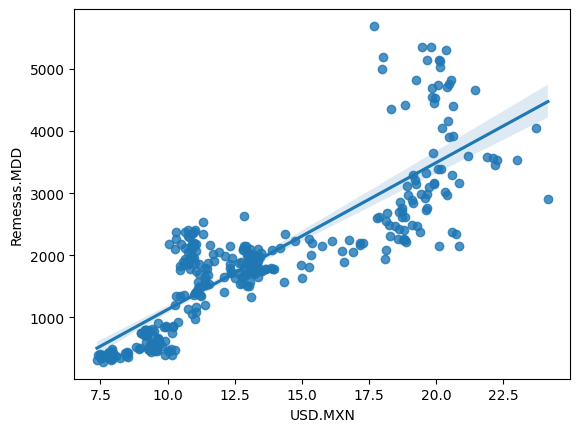

In [ ]:
sns.regplot(x = df['USD.MXN'], y = df['Remesas.MDD'], data = df)


Esta alta correlación sugiere que existe una estrecha interacción entre las remesas que llegan a México y el tipo de cambio del peso mexicano con respecto al dólar estadounidense. A continuación, se detallan algunos aspectos importantes sobre esta relación:

Influencia en el flujo de remesas: Un tipo de cambio favorable, es decir, un peso mexicano más débil en comparación con el dólar, puede incentivar a los trabajadores mexicanos en el extranjero a enviar más remesas a sus familias en México. Esto se debe a que, cuando el tipo de cambio es más favorable, los dólares que envían se convierten en una mayor cantidad de pesos, lo que aumenta el poder adquisitivo de las familias en el país receptor.

Efecto en la economía mexicana: Las remesas son una fuente significativa de ingresos para muchas familias en México y desempeñan un papel importante en la economía del país. El aumento de las remesas puede tener un impacto positivo en el consumo interno y en el bienestar económico de las familias receptoras. Además, las remesas también pueden influir en el crecimiento económico y en la estabilidad financiera de México.

Impacto en la balanza de pagos: Las remesas son una de las principales fuentes de ingresos de divisas en México, lo que puede ayudar a mejorar la balanza de pagos del país. Una mayor entrada de divisas a través de las remesas puede tener un efecto estabilizador en el tipo de cambio y en las reservas internacionales.

Sensibilidad a cambios en el tipo de cambio: Dado que las remesas están fuertemente relacionadas con el tipo de cambio, cualquier variación significativa en este último puede tener un impacto directo en el flujo de remesas hacia México. Un fortalecimiento del peso mexicano puede reducir el monto en pesos que los trabajadores en el extranjero envían a sus familias, mientras que un debilitamiento del peso puede aumentar dicho monto.

## Predicción con Redes Neuronales y KERAS

In [ ]:
# Visualización Previa de la Inflación
inflacion = pd.read_csv("df.csv")

In [ ]:
inflacion = inflacion.drop(['USD.MXN','IPC USA','Remesas.MDD','IPE','IPI','B.Monetaria.MDP','AIN.MDP','DineroNuevo.MDP'], axis=1)
inflacion.head()

,Fecha,INPC Mexico
0,ene-96,0.517
1,feb-96,0.489
2,mar-96,0.438
3,abr-96,0.369
4,may-96,0.338


<Axes: xlabel='Fecha'>

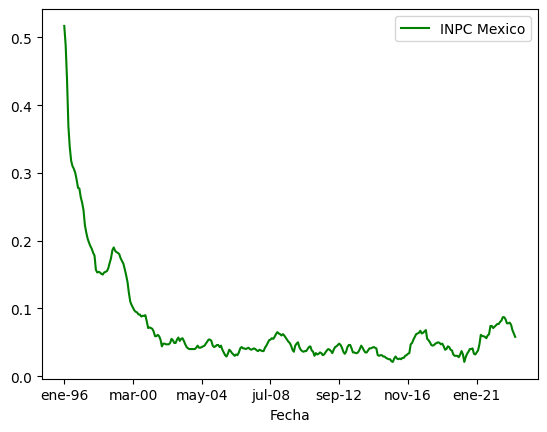

In [ ]:
inflacion.plot(x="Fecha", y="INPC Mexico",color="green")

In [ ]:
serieP=array([10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23])
print(serieP)

[10 25 23 14 25 23 14 85 14 36 10 25 23 14 25 23 14 85 14 36 10 25 23 14
 25 23 14 85 14 36 10 25 23 14 25 23]


In [ ]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)


In [ ]:
DescomponerSerie(serieP,12)

(array([[10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14],
        [14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36],
        [36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10],
        [10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 1

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23


In [ ]:
# Separación de datos para descomposición de serie
y = df['INPC Mexico']

In [ ]:
serieinf=list(y)
print(serieinf)

[0.517, 0.489, 0.438, 0.369, 0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197, 0.192, 0.188, 0.182, 0.178, 0.157, 0.153, 0.154, 0.153, 0.151, 0.15, 0.153, 0.154, 0.155, 0.159, 0.167, 0.174, 0.186, 0.19, 0.185, 0.183, 0.182, 0.18, 0.174, 0.17, 0.166, 0.158, 0.149, 0.139, 0.123, 0.11, 0.105, 0.101, 0.097, 0.095, 0.094, 0.091, 0.091, 0.088, 0.089, 0.089, 0.09, 0.081, 0.071, 0.072, 0.071, 0.07, 0.066, 0.059, 0.059, 0.061, 0.059, 0.054, 0.044, 0.048, 0.048, 0.047, 0.047, 0.047, 0.049, 0.055, 0.053, 0.049, 0.049, 0.054, 0.057, 0.052, 0.055, 0.056, 0.052, 0.047, 0.043, 0.041, 0.04, 0.04, 0.04, 0.04, 0.04, 0.042, 0.045, 0.042, 0.042, 0.043, 0.044, 0.045, 0.048, 0.051, 0.054, 0.054, 0.052, 0.045, 0.043, 0.044, 0.046, 0.046, 0.043, 0.045, 0.039, 0.035, 0.031, 0.029, 0.033, 0.039, 0.037, 0.034, 0.032, 0.03, 0.032, 0.031, 0.035, 0.041, 0.043, 0.041, 0.041, 0.04, 0.041, 0.042, 0.04, 0.039, 0.04, 0.041, 0.04, 0.038, 0.037, 0.039, 0.038, 0.037, 0.037

In [ ]:
DescomponerSerie(serieinf,12)

(array([[0.517, 0.489, 0.438, ..., 0.29 , 0.278, 0.277],
        [0.489, 0.438, 0.369, ..., 0.278, 0.277, 0.264],
        [0.438, 0.369, 0.338, ..., 0.277, 0.264, 0.256],
        ...,
        [0.075, 0.077, 0.077, ..., 0.078, 0.079, 0.076],
        [0.077, 0.077, 0.08 , ..., 0.079, 0.076, 0.068],
        [0.077, 0.08 , 0.082, ..., 0.076, 0.068, 0.063]]),
 array([0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197, 0.192, 0.188,
        0.182, 0.178, 0.157, 0.153, 0.154, 0.153, 0.151, 0.15 , 0.153,
        0.154, 0.155, 0.159, 0.167, 0.174, 0.186, 0.19 , 0.185, 0.183,
        0.182, 0.18 , 0.174, 0.17 , 0.166, 0.158, 0.149, 0.139, 0.123,
        0.11 , 0.105, 0.101, 0.097, 0.095, 0.094, 0.091, 0.091, 0.088,
        0.089, 0.089, 0.09 , 0.081, 0.071, 0.072, 0.071, 0.07 , 0.066,
        0.059, 0.059, 0.061, 0.059, 0.054, 0.044, 0.048, 0.048, 0.047,
        0.047, 0.047, 0.049, 0.055, 0.053, 0.049, 0.049, 0.054, 0.057,
        0.052, 0.055, 0.056, 0.052, 0.047, 0.043, 0.041, 0.04 , 0.04 ,
    

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[0.517, 0.489, 0.438, 0.369, 0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277] 0.264
[0.489, 0.438, 0.369, 0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264] 0.256
[0.438, 0.369, 0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256] 0.245
[0.369, 0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245] 0.223
[0.338, 0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223] 0.212
[0.318, 0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212] 0.203
[0.31, 0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203] 0.197
[0.306, 0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197] 0.192
[0.3, 0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197, 0.192] 0.188
[0.29, 0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197, 0.192, 0.188] 0.182
[0.278, 0.277, 0.264, 0.256, 0.245, 0.223, 0.212, 0.203, 0.197, 0.192, 0.188, 0.182] 0.178
[0.277, 0.264, 0.256, 0.245, 0.223

In [ ]:
# definimos el modelo SGD
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

In [ ]:
#TRAIN THE MODEL
model.fit(X, y, epochs=317, batch_size=10)

Epoch 1/317
32/32 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 
Epoch 2/317
32/32 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 3/317
32/32 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 4/317
32/32 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 5/317
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 6/317
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 7/317
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 8/317
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 9/317
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 10/317
32/32 [==============================] - 0s 2ms/step - loss

In [ ]:
#PREDICCIONES`
print("Generate predictions for 12 samples")
predictions = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 12 samples
10/10 [==============================] - 0s 2ms/step
predictions shape: [[0.2951718 ]
 [0.2652885 ]
 [0.25106943]
 [0.23316303]
 [0.2242041 ]
 [0.2250421 ]
 [0.21909748]
 [0.21517447]
 [0.20753619]
 [0.19549386]
 [0.18459807]
 [0.1783999 ]
 [0.16821757]
 [0.16908252]
 [0.15865086]
 [0.15491323]
 [0.14874677]
 [0.13822082]
 [0.13083592]
 [0.12893768]
 [0.12644908]
 [0.12114836]
 [0.11631814]
 [0.11389087]
 [0.11418765]
 [0.10943297]
 [0.110137  ]
 [0.11458082]
 [0.11896861]
 [0.12645963]
 [0.1314105 ]
 [0.1334581 ]
 [0.13458857]
 [0.13838089]
 [0.14159861]
 [0.14084588]
 [0.13915898]
 [0.14092192]
 [0.13949895]
 [0.13506135]
 [0.12992576]
 [0.12092808]
 [0.11101277]
 [0.10424941]
 [0.09964472]
 [0.09175555]
 [0.08769356]
 [0.08212823]
 [0.0798654 ]
 [0.07559285]
 [0.07651942]
 [0.07749975]
 [0.07680692]
 [0.07862345]
 [0.07364186]
 [0.0683942 ]
 [0.06940553]
 [0.06908561]
 [0.06697165]
 [0.06299987]
 [0.05758221]
 [0.06006031]
 [0.05781794]
 [0.059203

In [ ]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,0.295172
1,0.265289
2,0.251069
3,0.233163
4,0.224204


In [ ]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,0.264
1,0.256
2,0.245
3,0.223
4,0.212


In [ ]:
RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,0.295172,0.264
1,0.265289,0.256
2,0.251069,0.245
3,0.233163,0.223
4,0.224204,0.212


<Axes: >

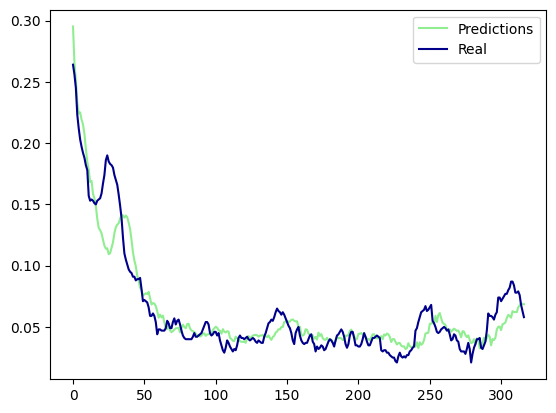

In [ ]:
RealPredictions.plot(y=['Predictions','Real'], color = ['lightgreen', 'darkblue'])

In [ ]:
# definimos el modelo ADAM
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [ ]:
#TRAIN THE MODEL
model.fit(X, y, epochs=317, batch_size=10)

Epoch 1/317
32/32 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 2/317
32/32 [==============================] - 0s 2ms/step - loss: 2.7746e-04 - accuracy: 0.0000e+00
Epoch 3/317
32/32 [==============================] - 0s 2ms/step - loss: 1.7067e-04 - accuracy: 0.0000e+00
Epoch 4/317
32/32 [==============================] - 0s 2ms/step - loss: 1.7226e-04 - accuracy: 0.0000e+00
Epoch 5/317
32/32 [==============================] - 0s 2ms/step - loss: 1.6166e-04 - accuracy: 0.0000e+00
Epoch 6/317
32/32 [==============================] - 0s 2ms/step - loss: 1.5920e-04 - accuracy: 0.0000e+00
Epoch 7/317
32/32 [==============================] - 0s 2ms/step - loss: 1.4882e-04 - accuracy: 0.0000e+00
Epoch 8/317
32/32 [==============================] - 0s 2ms/step - loss: 1.4784e-04 - accuracy: 0.0000e+00
Epoch 9/317
32/32 [==============================] - 0s 2ms/step - loss: 1.4496e-04 - accuracy: 0.0000e+00
Epoch 10/317
32/32 [=====================

In [ ]:
#PREDICCIONES
print("Generate predictions for 12 samples")
predictions2 = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 12 samples
10/10 [==============================] - 0s 3ms/step
predictions shape: [[0.2691826 ]
 [0.25854486]
 [0.2494185 ]
 [0.2386027 ]
 [0.21610393]
 [0.20491485]
 [0.19751973]
 [0.19170341]
 [0.18948708]
 [0.18621857]
 [0.17655148]
 [0.17494291]
 [0.15599224]
 [0.14793998]
 [0.15507689]
 [0.15208754]
 [0.1522432 ]
 [0.14944977]
 [0.15006092]
 [0.15187824]
 [0.15528817]
 [0.15857899]
 [0.1705451 ]
 [0.17475198]
 [0.18554421]
 [0.19185305]
 [0.18596798]
 [0.18237363]
 [0.18019171]
 [0.17916892]
 [0.17489187]
 [0.16898286]
 [0.16256611]
 [0.154578  ]
 [0.14430454]
 [0.13567433]
 [0.12162051]
 [0.10668497]
 [0.10140846]
 [0.09846304]
 [0.09614807]
 [0.09363947]
 [0.09160305]
 [0.08960632]
 [0.09041302]
 [0.08917997]
 [0.09073914]
 [0.09169176]
 [0.09050339]
 [0.08286891]
 [0.07094216]
 [0.0703291 ]
 [0.07066894]
 [0.07098553]
 [0.06732512]
 [0.05899561]
 [0.05590352]
 [0.05999492]
 [0.05924702]
 [0.0567167 ]
 [0.04646806]
 [0.04456834]
 [0.04849382]
 [0.047691

In [ ]:
Predictions2=pd.DataFrame(predictions2)
Predictions2.columns = ["Predictions"]
Predictions2.head()

,Predictions
0,0.269183
1,0.258545
2,0.249418
3,0.238603
4,0.216104


In [ ]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,0.264
1,0.256
2,0.245
3,0.223
4,0.212


In [ ]:
RealPredictions2=pd.concat([Predictions2,Real],axis=1)
RealPredictions2=pd.DataFrame(RealPredictions2)
RealPredictions2.head()

,Predictions,Real
0,0.269183,0.264
1,0.258545,0.256
2,0.249418,0.245
3,0.238603,0.223
4,0.216104,0.212


<Axes: >

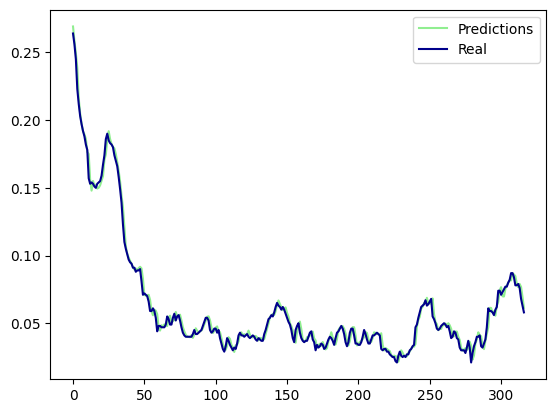

In [ ]:
RealPredictions2.plot(y=['Predictions','Real'], color = ['lightgreen', 'darkblue'])

In [ ]:
# demonstrate prediction
x_input = array([0.079,0.081,0.086,0.086,0.084,0.07,0.078,0.079,0.076,0.068,0.062, 0.058])
x_input = x_input.reshape((1, 12))
x_input

array([[0.079, 0.081, 0.086, 0.086, 0.084, 0.07 , 0.078, 0.079, 0.076,
        0.068, 0.062, 0.058]])

In [ ]:
valores_nuevos=[]
for i in range(12):
    # Predecir el siguiente valor basado en los datos iniciales
    siguiente_valor = model.predict(np.reshape(x_input,(1,12)))

    # Agregar el siguiente valor a los datos iniciales para la siguiente iteración
    x_input = np.append(x_input, siguiente_valor)
    x_input = x_input[1:]  # Descartar el primer valor para mantener solo los últimos 12

    # Guardarlos un arreglo
    valores_nuevos.append(siguiente_valor)

1/1 [==============================] - 0s 22ms/step


In [ ]:
valores_nuevos = np.array(valores_nuevos)
print(valores_nuevos)

[[[0.05534871]]

 [[0.05311662]]

 [[0.05416726]]

 [[0.05415963]]

 [[0.05731077]]

 [[0.05430475]]

 [[0.05454506]]

 [[0.05417874]]

 [[0.05614077]]

 [[0.05712105]]

 [[0.05913491]]

 [[0.06051166]]]
